# Modelos de espaço de estado

- Modelos estruturais/modelos dinâmicos

- Previsão Bayesiana

por **Cibele Russo**

Baseado em

- COMMANDEUR, J. J. F., and KOOPMAN, S. J. An Introduction to State Space Time Series Analysis. Oxford ; New York: Oxford University Press. 2007.

- DURBIN, J., and KOOPMAN, S. J.. Time Series Analysis by State Space Methods: Second Edition. Oxford University Press. 2012.

- FRANCO, G. C., GAMERMAN, D., & SANTOS, T. R. Modelos de espaço de estados: abordagens clássica e bayesiana. São Paulo: Associação Brasileira de Estatística. Disponível em https://www.researchgate.net/publication/340979229_Modelos_de_Espaco_de_Estados_Abordagens_Classica_e_Bayesiana. Acessado em 21/06/2021. 2009.

- MIGON, H., GAMERMAN, D. & RODRIGUEZ, R. Introdução aos Modelos Dinâmicos Bayesianos. Disponível em http://www.din.uem.br/sbpo/sbpo2004/pdf/arq0278.pdf . Acessado em 21/06/2021. 2004.

Leituras adicionais:

- https://www.statsmodels.org/stable/statespace.html

- https://www.statsmodels.org/devel/examples/notebooks/generated/statespace_local_linear_trend.html

- http://www.chadfulton.com/fulton_statsmodels_2017/sections/1-introduction.html



## Modelos de espaço de estado

- Bastante utilizados em engenharia de controle.

- Na abordagem clássica, são usados "modelos estruturais".

- Na abordagem bayesiana, são usados "modelos dinâmicos".

- Permitem a modelagem multivariada de dados.

- Permitem a inclusão de variáveis endógenas e exógenas.


- Alguns exemplos de aplicação:
    
    - Educação: Prever o nível educacional, com variáveis exógenas, por exemplo acesso a escola, renda, e endógenas, por exemplo habilidades individuais.
    
    - Finanças: Prever o valor de uma ação, com variáveis exógenas, por exemplo, política externa, e endógenas, por exemplo, lucro da empresa.
    


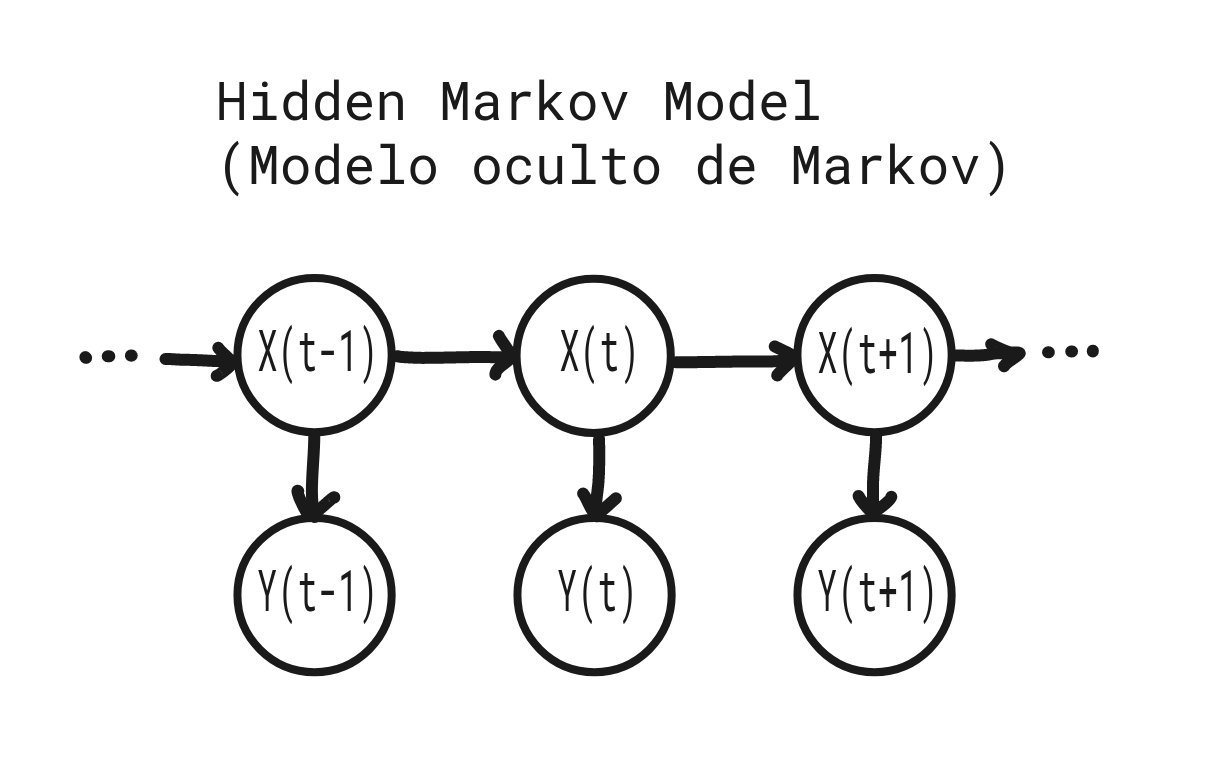






A variável oculta $X(t)$ (no instante de tempo $t$ depende exclusivamente do valor da variável escondida $X(t-1)$ (no instante de tempo $t-1$, o que é chamado de propriedade de Markov. Da mesma forma, o valor da variável observada $Y(t)$ depende exclusivamente do valor da variável escondida $X(t)$ (ambas no instante de tempo $t$).


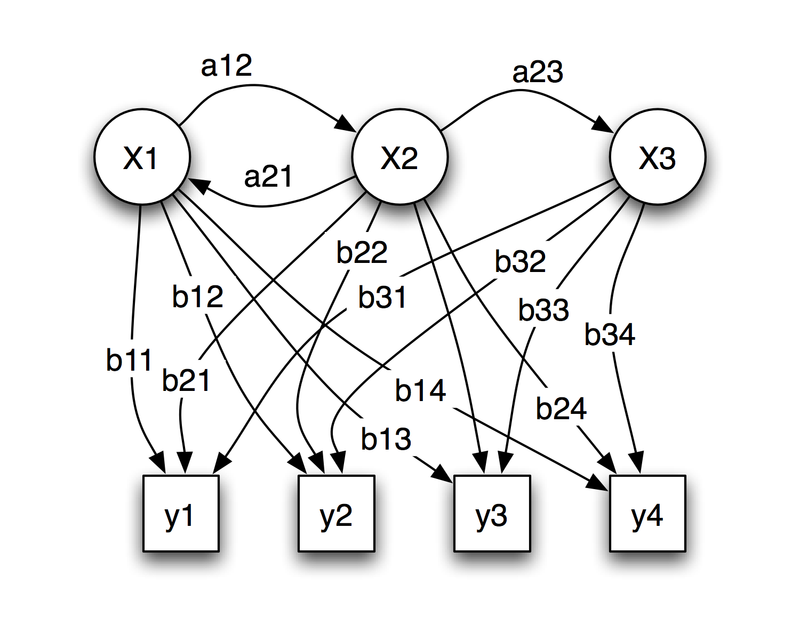


Exemplo de parâmetros probabilísticos de um modelo oculto de Markov

- x: estados

- y: possíveis observações

- a: probabilidades de transição de estado

- b: probabilidades de saídas

Fonte: https://pt.wikipedia.org/wiki/Modelo_oculto_de_Markov


## Análise de séries temporais via método de espaço de estado

Fonte: https://www.statsmodels.org/stable/statespace.html

Um modelo geral de espaço de estado pode ser escrito na forma

$$\begin{array}{ll}y_t & = X_t \alpha_t + d_t + \varepsilon_t \\
  \alpha_{t+1} & = T_t \alpha_t + c_t + R_t \eta_t\end{array}$$
  
em que

- $y_t$ se refere ao vetor observável no tempo $t$,

- $\alpha_t$ se refere ao vetor do estado não-observável no tempo $t$,

e em que os componentes aleatórias são definidos como


$$\begin{array}{l}\varepsilon_t \sim N(0, H_t) \\
  \eta_t \sim N(0, Q_t)\end{array}$$

As variáveis restantes $(X_t, d_t, H_t, T_t, c_t, R_t, Q_t)$ nas equações são matrizes que descrevem o processo. Seus nomes e dimensões são dadas por

- $X$: matriz de desenho $(k\_endog \times k\_states \times nobs)$

- $d$: intercepto das observações $(k\_endog \times nobs)$

- $T$: matriz de transição $(k\_states \times k\_states \times nobs)$

- $c$: intercepto do estado $(k\_states \times nobs)$

- $R$: matriz de seleção $(k\_states \times k\_posdef \times nobs)$

- $H$: matriz de covariância das observações $(k\_endog \times k\_endog \times nobs)$

- $Q$: covariância de estado $(k\_posdef \times k\_posdef \times nobs)$



No caso em que uma das matrizes seja invariante no tempo (por exemplo $X_t = X_{t+1} ~ \forall ~ t$), sua última dimensão seria $nobs=1$.

Esta forma genérica encapsula muitas das séries temporais lineares mais populares
modelos (veja abaixo) e é muito flexível, permitindo a estimativa com falta
observações, previsões, funções de resposta a impulsos e muito mais.

**Exemplo: Modelo AR(2)**

Um modelo autoregressivo é um bom exemplo introdutório para colocar modelos na forma de espaço de estado. Um modelo AR (2) geralmente é escrito como:

$y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \epsilon_t, \quad \epsilon_t \sim N(0, \sigma^2)$

Vamos colocar na forma do espaço de estado, para isso note que

$\begin{bmatrix} y_t \\ y_{t-1} \end{bmatrix}  = \begin{bmatrix}
      \phi_1 & \phi_2 \\
           1 &      0
   \end{bmatrix} \begin{bmatrix} y_{t-1} \\ y_{t-2} \end{bmatrix}  + \begin{bmatrix} 1 \\ 0 \end{bmatrix} \epsilon_t.$


Defina ${\alpha}_t = (y_t, y_{t-1})^\top$. Logo, podemos escrever as seguintes equações

Equação de medida:

$y_t  = \begin{bmatrix} 1 & 0 \end{bmatrix} {\alpha}_t$

Equação de transição:

$\begin{array}{ll}
   {\alpha}_{t+1} & = \begin{bmatrix}
      \phi_1 & \phi_2 \\
           1 &      0
   \end{bmatrix} {\alpha}_t + \begin{bmatrix} 1 \\ 0 \end{bmatrix} \eta_t\end{array}$


Na forma geral do modelo de espaço de estado

$\begin{array}{ll}y_t & = X_t \alpha_t + d_t + \varepsilon_t \\
  {\alpha}_{t+1} & = T_t {\alpha}_t + c_t + R_t \eta_t\end{array}$

temos

$X_t \equiv X = \begin{bmatrix} 1 & 0 \end{bmatrix}$, $T_t \equiv T  = \begin{bmatrix}
      \phi_1 & \phi_2 \\
           1 &      0
   \end{bmatrix}$, $R_t \equiv R  = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$, $\eta_t \equiv \epsilon_{t+1} \sim N(0, \sigma^2)$ e os demais termos nulos.

Os três parâmetros desconhecidos desse modelo são $\phi_1, \phi_2$ e $\sigma^2$.

## Alguns modelos de espaço de estado específicos

Para maior profundidade, ver FRANCO et. al (2009) (https://www.researchgate.net/publication/340979229_Modelos_de_Espaco_de_Estados_Abordagens_Classica_e_Bayesiana).

- Modelo de nível local (MNL)

- Modelo de tendência local (MTL)

- Modelo de tendência polinomial (MTP)

- Modelo estrutural básico (MEB): tendência + sazonalidade


## Métodos de estimação para o modelo de espaço de estado


Alguns métodos são utilizados para a estimação de parâmetros e vetor de estados


- Filtro de Kalman: Um algoritmo recursivo que determina a estimativa do vetor de estados no tempo $t$ dada toda a informação disponı́vel até o instante $t - 1$. https://pt.wikipedia.org/wiki/Filtro_de_Kalman


- Estimação de Máxima verossimilhança na abordagem clássica, em geral numericamente, com um algoritmo de otimização não linear, por exemplo BFGS


- Markov chain Monte Carlo (MCMC) na abordagem Bayesiana, média a posteriori, mediana a posteriori, moda a posteriori, estimador de Bayes.

## Modelos SARIMAX

Fonte: https://www.statsmodels.org/stable/examples/notebooks/generated/statespace_sarimax_stata.html

**Motivação**

Considere os dados apresentados no artigo

FRIEDMAN,  M.,  and  D. MEISELMAN.  The  relative  stability  of  monetary  velocity  and  the  investment  multiplier  in the  United  States,  1897–1958.  In Stabilization  Policies, Commission  on  Money  and  Credit,  123–126.  EnglewoodCliffs,  NJ:  Prentice  Hall. 1963.

Os autores postulam uma relação direta entre as despesas de consumo pessoal (consump) e o suprimento de dinheiro medido por M2 (m2)

$$consumo = \beta_0 + \beta_1 m2_t + \epsilon_t$$


Como definir um modelo com variáveis exógenas com erros SARIMA?

Uma proposta é considerar


$$y_t =\beta_0 + \beta_1 x_t+u_t$$


$$ \phi_p(B) \Phi_P(B^m ) \Delta^d\Delta^D_m u_t = A(t) + \theta_q(B) \Theta_Q (B^m ) a_ t $$

que podemos colocar na forma dos modelos de espaço de estado que falamos acima.

### Aplicação

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO

# Evitar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

pd.plotting.register_matplotlib_converters()

%matplotlib inline


In [2]:
# Leitura dos dados
friedman2 = requests.get('https://www.stata-press.com/data/r12/friedman2.dta').content
data = pd.read_stata(BytesIO(friedman2))
data.index = data.time
data.index.freq = "QS-OCT"

data

,m2,time,m1,consump,pc92
time,,,,,
1946-01-01,NaN,1946-01-01,NaN,134.899994,NaN
1946-04-01,NaN,1946-04-01,NaN,140.100006,NaN
1946-07-01,NaN,1946-07-01,NaN,148.899994,NaN
1946-10-01,NaN,1946-10-01,NaN,153.199997,NaN
1947-01-01,NaN,1947-01-01,NaN,156.600006,912.099976
...,...,...,...,...,...
1997-07-01,3979.270020,1997-07-01,1063.550049,5540.299805,4947.000000
1997-10-01,4046.389893,1997-10-01,1076.040039,5593.200195,4981.000000
1998-01-01,4133.879883,1998-01-01,1081.109985,5676.500000,5055.100098


In [3]:
data.index

DatetimeIndex(['1946-01-01', '1946-04-01', '1946-07-01', '1946-10-01',
               '1947-01-01', '1947-04-01', '1947-07-01', '1947-10-01',
               '1948-01-01', '1948-04-01',
               ...
               '1996-04-01', '1996-07-01', '1996-10-01', '1997-01-01',
               '1997-04-01', '1997-07-01', '1997-10-01', '1998-01-01',
               '1998-04-01', '1998-07-01'],
              dtype='datetime64[ns]', name='time', length=211, freq='QS-OCT')

<Axes: xlabel='time'>

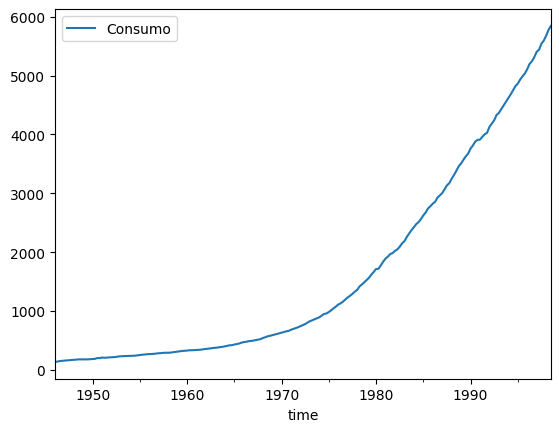

In [4]:
# Visualização dos dados

data['consump'].plot(label='Consumo', legend=True)

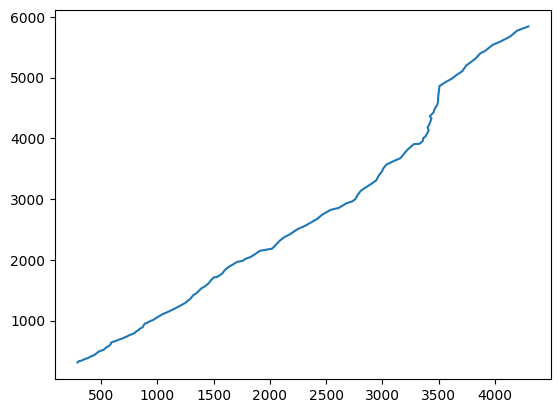

In [5]:
# Explorando a associação entre as variáveis

plt.plot(data['m2'],data['consump'])

In [6]:
# Definição de variáveis endógenas e exógenas + inclusão de intercepto para exog

endog = data.loc['1959':'1981', 'consump']
exog = sm.add_constant(data.loc['1959':'1981', 'm2'])


In [7]:
exog.head()

,const,m2
time,,
1959-01-01,1.0,289.149994
1959-04-01,1.0,294.049988
1959-07-01,1.0,296.730011
1959-10-01,1.0,297.799988
1960-01-01,1.0,299.350006


In [8]:
# Vamos ajustar um modelo ARMA(1,1) considerando os dados de 1959 a 1981
# Veja https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

modelo = sm.tsa.statespace.SARIMAX(endog, exog, order=(1,0,1))
resultado = modelo.fit(disp=False)
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:                consump   No. Observations:                   92
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -340.508
Date:                Fri, 02 Aug 2024   AIC                            691.015
Time:                        23:48:16   BIC                            703.624
Sample:                    01-01-1959   HQIC                           696.105
                         - 10-01-1981                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.0606     56.643     -0.637      0.524    -147.078      74.957
m2             1.1220      0.036     30.824      0.000       1.051       1.193
ar.L1          0.9348      0.041     22.717      0.0

In [9]:
# Base de dados até 1981

raw = pd.read_stata(BytesIO(friedman2))
raw.index = raw.time
raw.index.freq = "QS-OCT"
data = raw.loc[:'1981']


In [10]:
data

,m2,time,m1,consump,pc92
time,,,,,
1946-01-01,NaN,1946-01-01,NaN,134.899994,NaN
1946-04-01,NaN,1946-04-01,NaN,140.100006,NaN
1946-07-01,NaN,1946-07-01,NaN,148.899994,NaN
1946-10-01,NaN,1946-10-01,NaN,153.199997,NaN
1947-01-01,NaN,1947-01-01,NaN,156.600006,912.099976
...,...,...,...,...,...
1980-10-01,1601.099976,1980-10-01,408.920013,1836.800049,3034.199951
1981-01-01,1638.000000,1981-01-01,418.920013,1890.300049,3045.600098
1981-04-01,1670.550049,1981-04-01,423.899994,1923.500000,3045.800049


In [11]:
# Variáveis endógenas e exógenas
endog = data.loc['1959':, 'consump']
exog = sm.add_constant(data.loc['1959':, 'm2'])
nobs = endog.shape[0]

# Ajuste do modelo até 1978
modelo = sm.tsa.statespace.SARIMAX(endog.loc[:'1978-01-01'], exog=exog.loc[:'1978-01-01'], order=(1,0,1))
fit_resultado = modelo.fit(disp=False)
print(fit_resultado.summary())

                               SARIMAX Results                                
Dep. Variable:                consump   No. Observations:                   77
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -243.316
Date:                Fri, 02 Aug 2024   AIC                            496.633
Time:                        23:48:20   BIC                            508.352
Sample:                    01-01-1959   HQIC                           501.320
                         - 01-01-1978                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6782     18.492      0.037      0.971     -35.565      36.922
m2             1.0379      0.021     50.329      0.000       0.997       1.078
ar.L1          0.8775      0.059     14.859      0.0

In [12]:
modelo = sm.tsa.statespace.SARIMAX(endog, exog=exog, order=(1,0,1))
resultado = modelo.filter(fit_resultado.params)

In [13]:
# Previsão um passo a frente com intervalo de previsão

previsao = resultado.get_prediction()
previsao_ip = previsao.conf_int()

In [14]:
# Previsão dinâmica

data_previsao_dinamica = '1978-01-01'

previsao_di = resultado.get_prediction(dynamic=data_previsao_dinamica)
previsao_di_ip = previsao_di.conf_int()


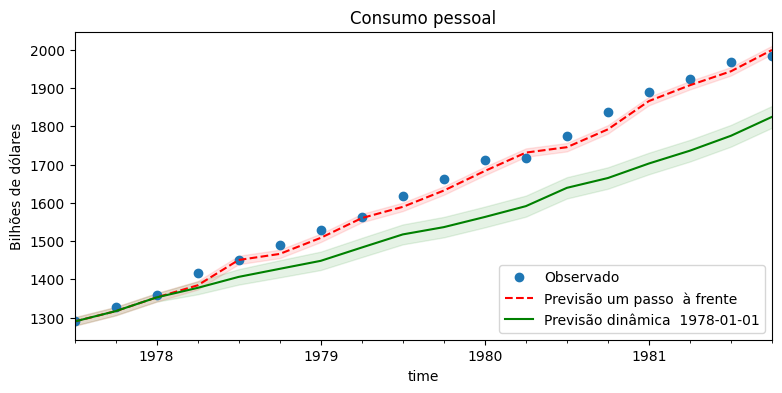

In [15]:
# Visualização dos resultados

# Sobre previsão passo à frente e previsão dinâmica:
# Jackson, E. A. (2018). Comparison between static and dynamic forecast in autoregressive integrated moving average for seasonally adjusted headline consumer price index. Available at SSRN 3162606. Disponível em https://mpra.ub.uni-muenchen.de/86180/1/MPRA_paper_86180.pdf. Acessado em 01/08/2020.


fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='Consumo pessoal', xlabel='Data', ylabel='Bilhões de dólares')

# Plota os dados
data.loc['1977-07-01':, 'consump'].plot(ax=ax, style='o', label='Observado')

# Previsões
previsao.predicted_mean.loc['1977-07-01':].plot(ax=ax, style='r--', label='Previsão um passo  à frente')
ip = previsao_ip.loc['1977-07-01':]
ax.fill_between(ip.index, ip.iloc[:,0], ip.iloc[:,1], color='r', alpha=0.1)

previsao_di.predicted_mean.loc['1977-07-01':].plot(ax=ax, style='g', label='Previsão dinâmica  %s' % data_previsao_dinamica )
ip = previsao_di_ip.loc['1977-07-01':]
ax.fill_between(ip.index, ip.iloc[:,0], ip.iloc[:,1], color='g', alpha=0.1)

legend = ax.legend(loc='lower right')

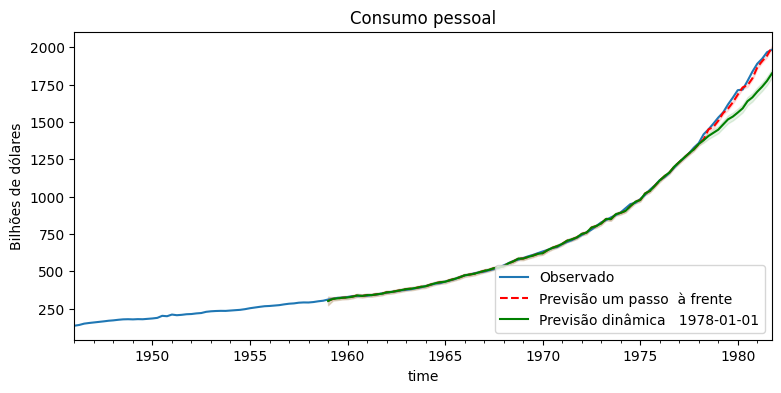

In [16]:
# Visualização dos resultados

fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='Consumo pessoal', xlabel='Data', ylabel='Bilhões de dólares')

# Plota os dados
data['consump'].plot(ax=ax, label='Observado')

# Previsões
previsao.predicted_mean.plot(ax=ax, style='r--', label='Previsão um passo  à frente')
ip = previsao_ip
ax.fill_between(ip.index, ip.iloc[:,0], ip.iloc[:,1], color='r', alpha=0.1)

previsao_di.predicted_mean.plot(ax=ax, style='g', label='Previsão dinâmica   %s' % data_previsao_dinamica )
ip = previsao_di_ip
ax.fill_between(ip.index, ip.iloc[:,0], ip.iloc[:,1], color='g', alpha=0.1)

legend = ax.legend(loc='lower right')

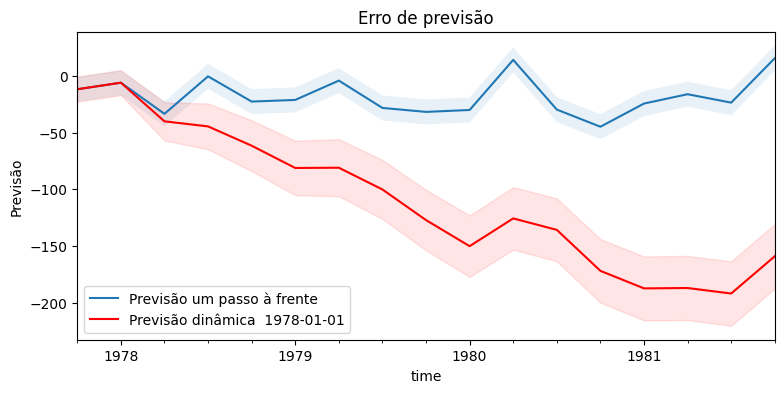

In [17]:
# Erro de predição

fig, ax = plt.subplots(figsize=(9,4))
npre = 4
ax.set(title='Erro de previsão', xlabel='Data', ylabel='Previsão')

# Previsão um passo à frente com intervalos de 95% de confiança
erro_previsao = previsao.predicted_mean - endog
erro_previsao.loc['1977-10-01':].plot(ax=ax, label='Previsão um passo à frente')

ip = previsao_ip.loc['1977-10-01':].copy()
ip.iloc[:,0] -= endog.loc['1977-10-01':]
ip.iloc[:,1] -= endog.loc['1977-10-01':]

ax.fill_between(ip.index, ip.iloc[:,0], ip.iloc[:,1], alpha=0.1)

# Previsão dinâmica com intervalos de 95% de confiança
erro_previsao_di = previsao_di.predicted_mean - endog
erro_previsao_di.loc['1977-10-01':].plot(ax=ax, style='r', label='Previsão dinâmica  %s' % data_previsao_dinamica )

ip_di = previsao_di_ip.loc['1977-10-01':].copy()
ip_di.iloc[:,0] -= endog.loc['1977-10-01':]
ip_di.iloc[:,1] -= endog.loc['1977-10-01':]

ax.fill_between(ip_di.index, ip_di.iloc[:,0], ip_di.iloc[:,1], color='r', alpha=0.1)

legend = ax.legend(loc='lower left');
legend.get_frame().set_facecolor('w')

**Exercício: mude a data da previsão dinâmica e verifique como se alteram as previsões e os erros de previsão**

## Previsão Bayesiana

Leituras adicionais recomendada:


- Pacote Tensorflow Probability: https://www.tensorflow.org/probability

- Modelagem de séries temporais estruturais: https://blog.tensorflow.org/2019/03/structural-time-series-modeling-in.html

- HARVEY, A. C. Forecasting, structural time series models and the Kalman filter. Cambridge University Press. 1989.


Os modelos de séries temporais estruturais (STS) são vistos como uma família de modelos de probabilidade que incluem

- processos autorregressivos,

- médias móveis,

- tendências lineares locais,

- sazonalidade e

- regressão e seleção de variáveis em covariáveis externas (outras séries temporais potencialmente relacionadas às séries de interesse).


De uma forma bem simplificada, um modelo de séries temporais estruturais considera que a série temporal pode ser escrita como uma soma de n componentes

$$f(t) = f_1(t) + f_2(t) + \ldots + f_n(t) + \epsilon_t, \ \ \epsilon_t\sim N(0,\sigma^2)$$

A modelagem bayesiana assume que os parâmetros desse modelo seguem distribuições de probabilidade (distribuições a priori) e, a partir da distribuição conjunta dos parâmetros e dados, obtém estimativas a partir da distribuição a posteriori dos parâmetros dadas as observações. No pacote tensorflow_probability são implementados métodos de inferência variacional e Monte Carlo Hamiltoniano.


### Aplicação


Fonte da implementação:

https://github.com/tensorflow/probability/blob/master/tensorflow_probability/examples/jupyter_notebooks/Structural_Time_Series_Modeling_Case_Studies_Atmospheric_CO2_and_Electricity_Demand.ipynb


Fonte original dos dados de CO2:

https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html

KEELING,C. D., PIPER, S. C., BACASTOW, R. B., WAHLEN, M. WHORF, T. P., HEIMANN, M. and MEIJER, H. A.  Atmospheric CO2 and 13CO2 exchange with the terrestrial biosphere and oceans from 1978 to 2000: observations and carbon cycle implications, pages 83-113, in "A History of Atmospheric CO2 and its effects on Plants, Animals, and Ecosystems", editors, Ehleringer, J.R., T. E. Cerling, M. D. Dearing, Springer Verlag, New York, 2005.

In [18]:
# ATENÇÃO: Podem ocorrer problemas de compatibilidade dos pacotes. Se necessário, instalar os pacotes abaixo


#!pip install -U -q segmentation-models
#!pip install -q tensorflow==2.5.0
#!pip install -q keras==2.4.3
#!pip install -U tensorboard==1.15.0

In [19]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
from matplotlib import pylab as plt
import matplotlib.dates as mdates
import seaborn as sns

import collections

import numpy as np
import tensorflow.compat.v2 as tf
import tensorflow_probability as tfp

from tensorflow_probability import distributions as tfd
from tensorflow_probability import sts


# Evitar warnings não prejudiciais
import warnings
warnings.filterwarnings('ignore')

pd.plotting.register_matplotlib_converters()


In [20]:
# Algumas funções auxiliares e definição de estilo para a visualização dos dados e de previsões

# Fonte: https://github.com/tensorflow/probability/blob/master/tensorflow_probability/examples/jupyter_notebooks/Structural_Time_Series_Modeling_Case_Studies_Atmospheric_CO2_and_Electricity_Demand.ipynb

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


sns.set_context("notebook", font_scale=1.)
sns.set_style("whitegrid")
%config InlineBackend.figure_format = 'retina'


def plot_forecast(x, y,
                  forecast_mean, forecast_scale, forecast_samples,
                  title, x_locator=None, x_formatter=None):
  """Plot a forecast distribution against the 'true' time series."""
  colors = sns.color_palette()
  c1, c2 = colors[0], colors[1]
  fig = plt.figure(figsize=(12, 6))
  ax = fig.add_subplot(1, 1, 1)

  num_steps = len(y)
  num_steps_forecast = forecast_mean.shape[-1]
  num_steps_train = num_steps - num_steps_forecast


  ax.plot(x, y, lw=2, color=c1, label='ground truth')

  forecast_steps = np.arange(
      x[num_steps_train],
      x[num_steps_train]+num_steps_forecast,
      dtype=x.dtype)

  ax.plot(forecast_steps, forecast_samples.T, lw=1, color=c2, alpha=0.1)

  ax.plot(forecast_steps, forecast_mean, lw=2, ls='--', color=c2,
           label='forecast')
  ax.fill_between(forecast_steps,
                   forecast_mean-2*forecast_scale,
                   forecast_mean+2*forecast_scale, color=c2, alpha=0.2)

  ymin, ymax = min(np.min(forecast_samples), np.min(y)), max(np.max(forecast_samples), np.max(y))
  yrange = ymax-ymin
  ax.set_ylim([ymin - yrange*0.1, ymax + yrange*0.1])
  ax.set_title("{}".format(title))
  ax.legend()

  if x_locator is not None:
    ax.xaxis.set_major_locator(x_locator)
    ax.xaxis.set_major_formatter(x_formatter)
    fig.autofmt_xdate()

  return fig, ax


def plot_components(dates,
                    component_means_dict,
                    component_stddevs_dict,
                    x_locator=None,
                    x_formatter=None):
  """Plot the contributions of posterior components in a single figure."""
  colors = sns.color_palette()
  c1, c2 = colors[0], colors[1]

  axes_dict = collections.OrderedDict()
  num_components = len(component_means_dict)
  fig = plt.figure(figsize=(12, 2.5 * num_components))
  for i, component_name in enumerate(component_means_dict.keys()):
    component_mean = component_means_dict[component_name]
    component_stddev = component_stddevs_dict[component_name]

    ax = fig.add_subplot(num_components,1,1+i)
    ax.plot(dates, component_mean, lw=2)
    ax.fill_between(dates,
                     component_mean-2*component_stddev,
                     component_mean+2*component_stddev,
                     color=c2, alpha=0.5)
    ax.set_title(component_name)
    if x_locator is not None:
      ax.xaxis.set_major_locator(x_locator)
      ax.xaxis.set_major_formatter(x_formatter)
    axes_dict[component_name] = ax
  fig.autofmt_xdate()
  fig.tight_layout()
  return fig, axes_dict


In [21]:
# Leitura dos dados e estabelecimento do índice

# CO2 readings from Mauna Loa observatory, monthly beginning January 1966
# Original source: http://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record
co2_by_month = np.array('320.62,321.60,322.39,323.70,324.08,323.75,322.38,320.36,318.64,318.10,319.78,321.03,322.33,322.50,323.04,324.42,325.00,324.09,322.54,320.92,319.25,319.39,320.73,321.96,322.57,323.15,323.89,325.02,325.57,325.36,324.14,322.11,320.33,320.25,321.32,322.89,324.00,324.42,325.63,326.66,327.38,326.71,325.88,323.66,322.38,321.78,322.85,324.12,325.06,325.98,326.93,328.14,328.08,327.67,326.34,324.69,323.10,323.06,324.01,325.13,326.17,326.68,327.17,327.79,328.92,328.57,327.36,325.43,323.36,323.56,324.80,326.01,326.77,327.63,327.75,329.73,330.07,329.09,328.04,326.32,324.84,325.20,326.50,327.55,328.55,329.56,330.30,331.50,332.48,332.07,330.87,329.31,327.51,327.18,328.16,328.64,329.35,330.71,331.48,332.65,333.09,332.25,331.18,329.39,327.43,327.37,328.46,329.57,330.40,331.40,332.04,333.31,333.97,333.60,331.90,330.06,328.56,328.34,329.49,330.76,331.75,332.56,333.50,334.58,334.88,334.33,333.05,330.94,329.30,328.94,330.31,331.68,332.93,333.42,334.70,336.07,336.75,336.27,334.92,332.75,331.59,331.16,332.40,333.85,334.97,335.38,336.64,337.76,338.01,337.89,336.54,334.68,332.76,332.55,333.92,334.95,336.23,336.76,337.96,338.88,339.47,339.29,337.73,336.09,333.92,333.86,335.29,336.73,338.01,338.36,340.07,340.77,341.47,341.17,339.56,337.60,335.88,336.02,337.10,338.21,339.24,340.48,341.38,342.51,342.91,342.25,340.49,338.43,336.69,336.86,338.36,339.61,340.75,341.61,342.70,343.57,344.14,343.35,342.06,339.81,337.98,337.86,339.26,340.49,341.38,342.52,343.10,344.94,345.76,345.32,343.98,342.38,339.87,339.99,341.15,342.99,343.70,344.50,345.28,347.06,347.43,346.80,345.39,343.28,341.07,341.35,342.98,344.22,344.97,345.99,347.42,348.35,348.93,348.25,346.56,344.67,343.09,342.80,344.24,345.56,346.30,346.95,347.85,349.55,350.21,349.55,347.94,345.90,344.85,344.17,345.66,346.90,348.02,348.48,349.42,350.99,351.85,351.26,349.51,348.10,346.45,346.36,347.81,348.96,350.43,351.73,352.22,353.59,354.22,353.79,352.38,350.43,348.73,348.88,350.07,351.34,352.76,353.07,353.68,355.42,355.67,355.12,353.90,351.67,349.80,349.99,351.30,352.52,353.66,354.70,355.38,356.20,357.16,356.23,354.81,352.91,350.96,351.18,352.83,354.21,354.72,355.75,357.16,358.60,359.34,358.24,356.17,354.02,352.15,352.21,353.75,354.99,355.99,356.72,357.81,359.15,359.66,359.25,357.02,355.00,353.01,353.31,354.16,355.40,356.70,357.17,358.38,359.46,360.28,359.60,357.57,355.52,353.69,353.99,355.34,356.80,358.37,358.91,359.97,361.26,361.69,360.94,359.55,357.48,355.84,356.00,357.58,359.04,359.97,361.00,361.64,363.45,363.80,363.26,361.89,359.45,358.05,357.75,359.56,360.70,362.05,363.24,364.02,364.71,365.41,364.97,363.65,361.48,359.45,359.61,360.76,362.33,363.18,363.99,364.56,366.36,366.80,365.63,364.47,362.50,360.19,360.78,362.43,364.28,365.33,366.15,367.31,368.61,369.30,368.88,367.64,365.78,363.90,364.23,365.46,366.97,368.15,368.87,369.59,371.14,371.00,370.35,369.27,366.93,364.64,365.13,366.68,368.00,369.14,369.46,370.51,371.66,371.83,371.69,370.12,368.12,366.62,366.73,368.29,369.53,370.28,371.50,372.12,372.86,374.02,373.31,371.62,369.55,367.96,368.09,369.68,371.24,372.44,373.08,373.52,374.85,375.55,375.40,374.02,371.48,370.70,370.25,372.08,373.78,374.68,375.62,376.11,377.65,378.35,378.13,376.61,374.48,372.98,373.00,374.35,375.69,376.79,377.36,378.39,380.50,380.62,379.55,377.76,375.83,374.05,374.22,375.84,377.44,378.34,379.61,380.08,382.05,382.24,382.08,380.67,378.67,376.42,376.80,378.31,379.96,381.37,382.02,382.56,384.37,384.92,384.03,382.28,380.48,378.81,379.06,380.14,381.66,382.58,383.71,384.34,386.23,386.41,385.87,384.45,381.84,380.86,380.86,382.36,383.61,385.07,385.84,385.83,386.77,388.51,388.05,386.25,384.08,383.09,382.78,384.01,385.11,386.65,387.12,388.52,389.57,390.16,389.62,388.07,386.08,384.65,384.33,386.05,387.49,388.55,390.07,391.01,392.38,393.22,392.24,390.33,388.52,386.84,387.16,388.67,389.81,391.30,391.92,392.45,393.37,394.28,393.69,392.59,390.21,389.00,388.93,390.24,391.80,393.07,393.35,394.36,396.43,396.87,395.88,394.52,392.54,391.13,391.01,392.95,394.34,395.61,396.85,397.26,398.35,399.98,398.87,397.37,395.41,393.39,393.70,395.19,396.82,397.92,398.10,399.47,401.33,401.88,401.31,399.07,397.21,395.40,395.65,397.23,398.79,399.85,400.31,401.51,403.45,404.10,402.88,401.61,399.00,397.50,398.28,400.24,401.89,402.65,404.16,404.85,407.57,407.66,407.00,404.50,402.24,401.01,401.50,403.64,404.55,406.07,406.64,407.06,408.95,409.91,409.12,407.20,405.24,403.27,403.64,405.17,406.75,408.05,408.34,409.25,410.30,411.30,410.88,408.90,407.10,405.59,405.99,408.12,409.23,410.92'.split(',')).astype(np.float32)

co2_by_month = co2_by_month
num_forecast_steps = 12 * 10 # Vamos predizer os dados dos últimos 10 anos
co2_by_month_training_data = co2_by_month[:-num_forecast_steps]

co2_dates = np.arange("1966-01", "2019-02", dtype="datetime64[M]")
co2_loc = mdates.YearLocator(3)
co2_fmt = mdates.DateFormatter('%Y')

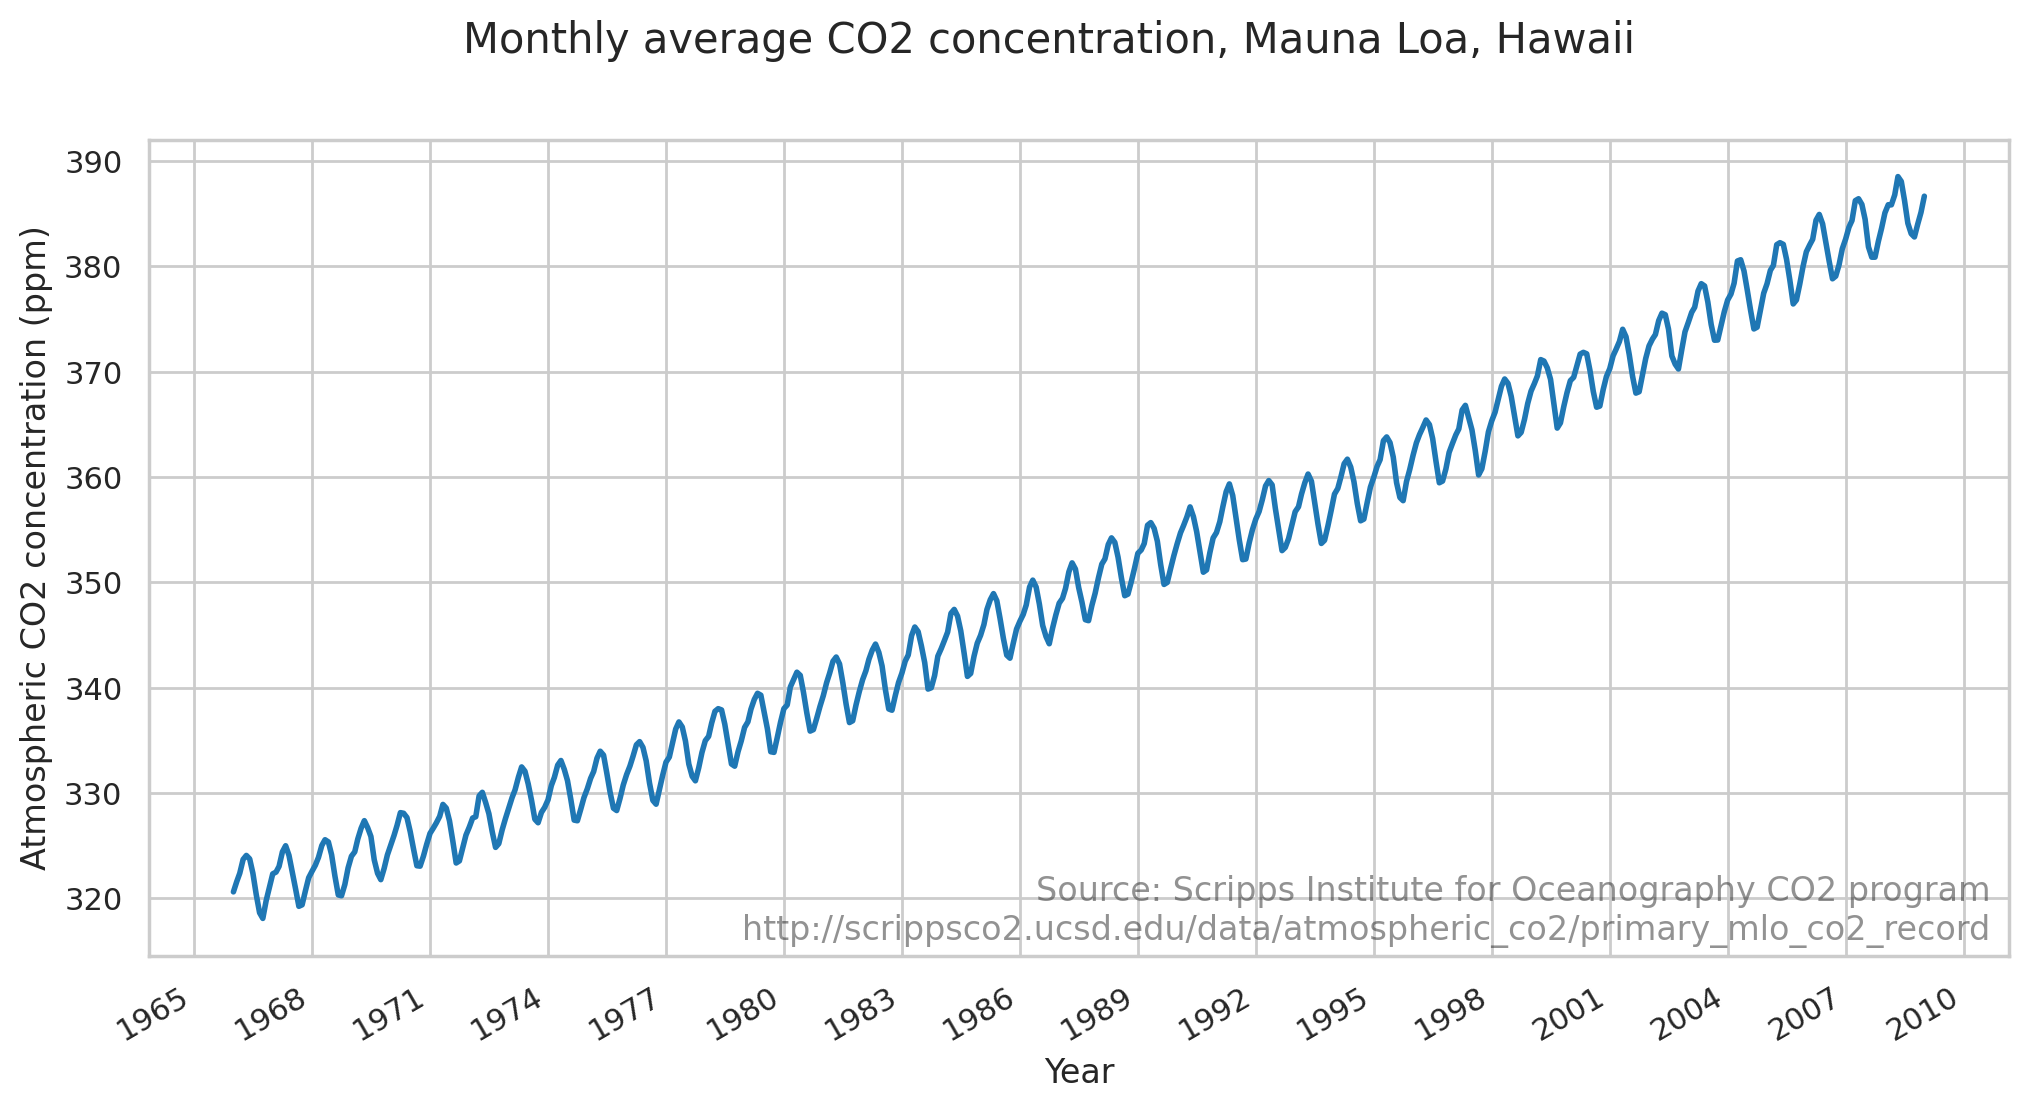

In [22]:
# Visualização dos dados

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(co2_dates[:-num_forecast_steps], co2_by_month_training_data, lw=2, label="training data")
ax.xaxis.set_major_locator(co2_loc)
ax.xaxis.set_major_formatter(co2_fmt)
ax.set_ylabel("Atmospheric CO2 concentration (ppm)")
ax.set_xlabel("Year")
fig.suptitle("Monthly average CO2 concentration, Mauna Loa, Hawaii",
             fontsize=15)
ax.text(0.99, .02,
        "Source: Scripps Institute for Oceanography CO2 program\nhttp://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record",
        transform=ax.transAxes,
        horizontalalignment="right",
        alpha=0.5)
fig.autofmt_xdate()

In [23]:
# função para ajuste de um modelo com tendência e sazonalidade
# Leituras adicionais:
# https://www.tensorflow.org/probability/api_docs/python/tfp/sts/LocalLinearTrend
# https://www.tensorflow.org/probability/api_docs/python/tfp/sts/Seasonal

def build_model(observed_time_series):
  trend = sts.LocalLinearTrend(observed_time_series=observed_time_series)
  seasonal = tfp.sts.Seasonal(
      num_seasons=12, observed_time_series=observed_time_series)
  model = sts.Sum([trend, seasonal], observed_time_series=observed_time_series)
  return model



In [24]:
# Evitar warnings não prejudiciais
import warnings
warnings.filterwarnings('ignore')

# Ajuste do modelo usando o pacote tensorflow_probability

co2_model = build_model(co2_by_month_training_data)

# A função build_factored_surrogate_posterior constrói as distribuições a posteriori "substitutas" para os parâmetros no modelo proposto, supondo distribuições a priori normais independentes para os parâmetros com hiperparâmetros treináveis, de forma a obter o suporte apropriado para esse parâmetro.

# Build the variational surrogate posteriors `qs`.
variational_posteriors = tfp.sts.build_factored_surrogate_posterior(
    model=co2_model)

### Evidence lower bound (ELBO) e método Bayesiano Variacional:

**https://en.wikipedia.org/wiki/Evidence_lower_bound**

**https://en.wikipedia.org/wiki/Variational_Bayesian_methods**


Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`


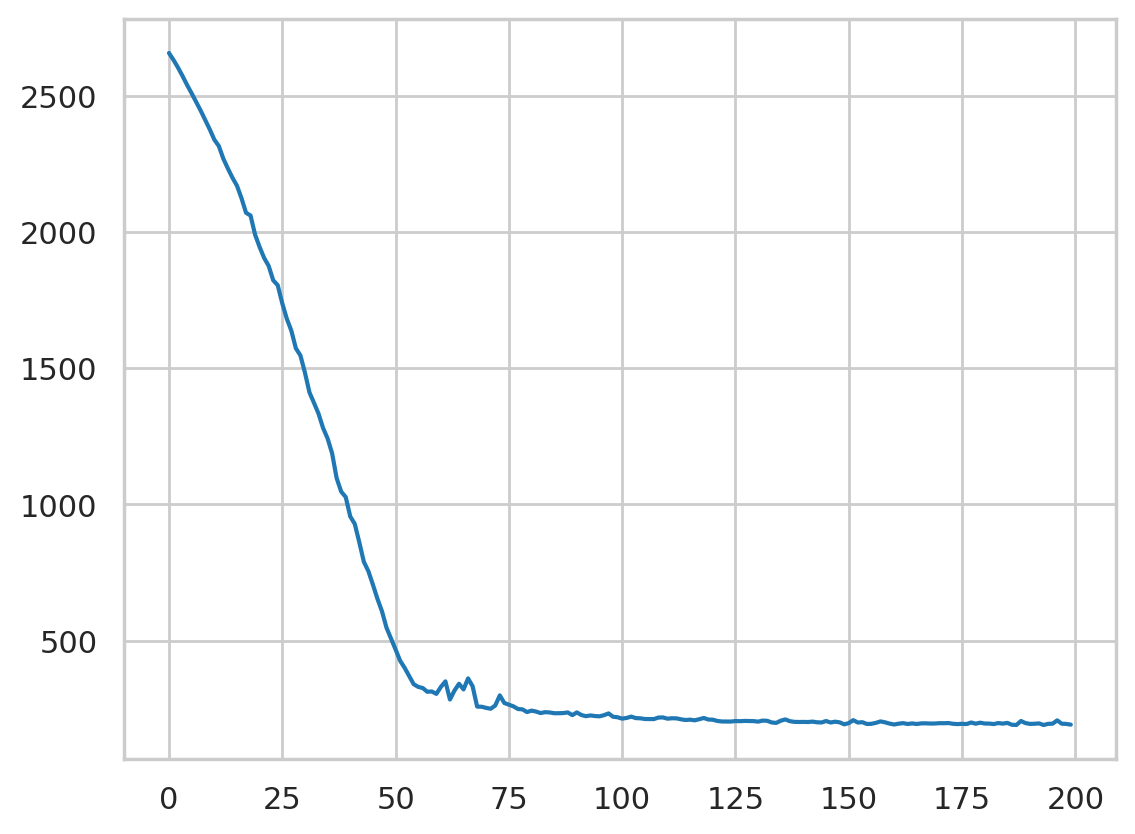

In [25]:
# Evitar warnings não prejudiciais
import warnings
warnings.filterwarnings('ignore')

#@title Minimize the variational loss.

# Allow external control of optimization to reduce test runtimes.
num_variational_steps = 200 # @param { isTemplate: true}
num_variational_steps = int(num_variational_steps)

optimizer = tf.optimizers.Adam(learning_rate=.1)

# Using fit_surrogate_posterior to build and optimize the variational loss function.
@tf.function(experimental_compile=True)
def train():
  elbo_loss_curve = tfp.vi.fit_surrogate_posterior(
    target_log_prob_fn=co2_model.joint_log_prob(
        observed_time_series=co2_by_month_training_data),
    surrogate_posterior=variational_posteriors,
    optimizer=optimizer,
    num_steps=num_variational_steps)
  return elbo_loss_curve

elbo_loss_curve = train()

plt.plot(elbo_loss_curve)
plt.show()


In [26]:
# Draw samples from the variational posterior.

q_samples_co2_ = variational_posteriors.sample(50)

<Axes: >

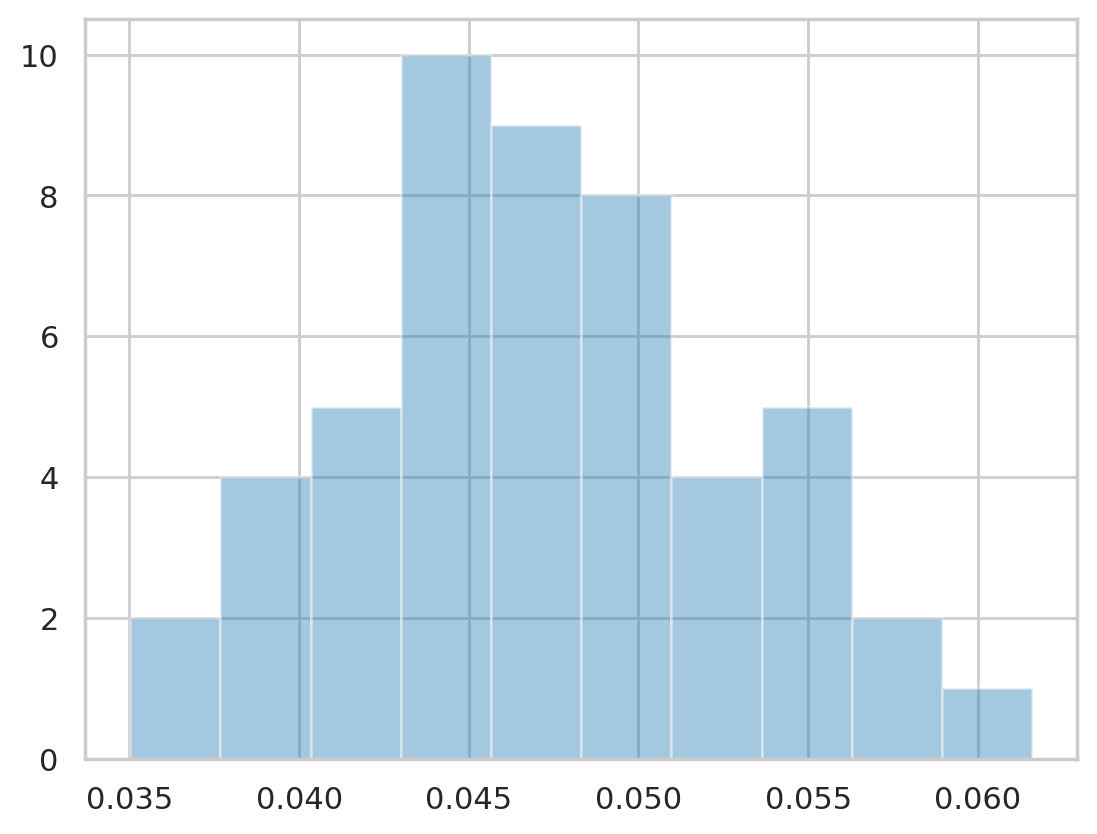

In [27]:
# Olhando para a "cara" da distribuição a posteriori (repita para outras componentes)
import seaborn as sns

sns.distplot(q_samples_co2_['Seasonal/_drift_scale'],kde=False, bins=10)

In [28]:
print("Inferred parameters:")
for param in co2_model.parameters:
  print("{}: {} +- {}".format(param.name,
                              np.mean(q_samples_co2_[param.name], axis=0),
                              np.std(q_samples_co2_[param.name], axis=0)))

Inferred parameters:
observation_noise_scale: 0.15868832170963287 +- 0.008480439893901348
LocalLinearTrend/_level_scale: 0.1742212474346161 +- 0.011727960780262947
LocalLinearTrend/_slope_scale: 0.006044793874025345 +- 0.002550594974309206
Seasonal/_drift_scale: 0.04711996391415596 +- 0.00583335105329752


In [29]:
# Previsão

co2_forecast_dist = tfp.sts.forecast(
    co2_model,
    observed_time_series=co2_by_month_training_data,
    parameter_samples=q_samples_co2_,
    num_steps_forecast=num_forecast_steps)



In [30]:
num_samples=10

co2_forecast_mean, co2_forecast_scale, co2_forecast_samples = (
    co2_forecast_dist.mean().numpy()[..., 0],
    co2_forecast_dist.stddev().numpy()[..., 0],
    co2_forecast_dist.sample(num_samples).numpy()[..., 0])

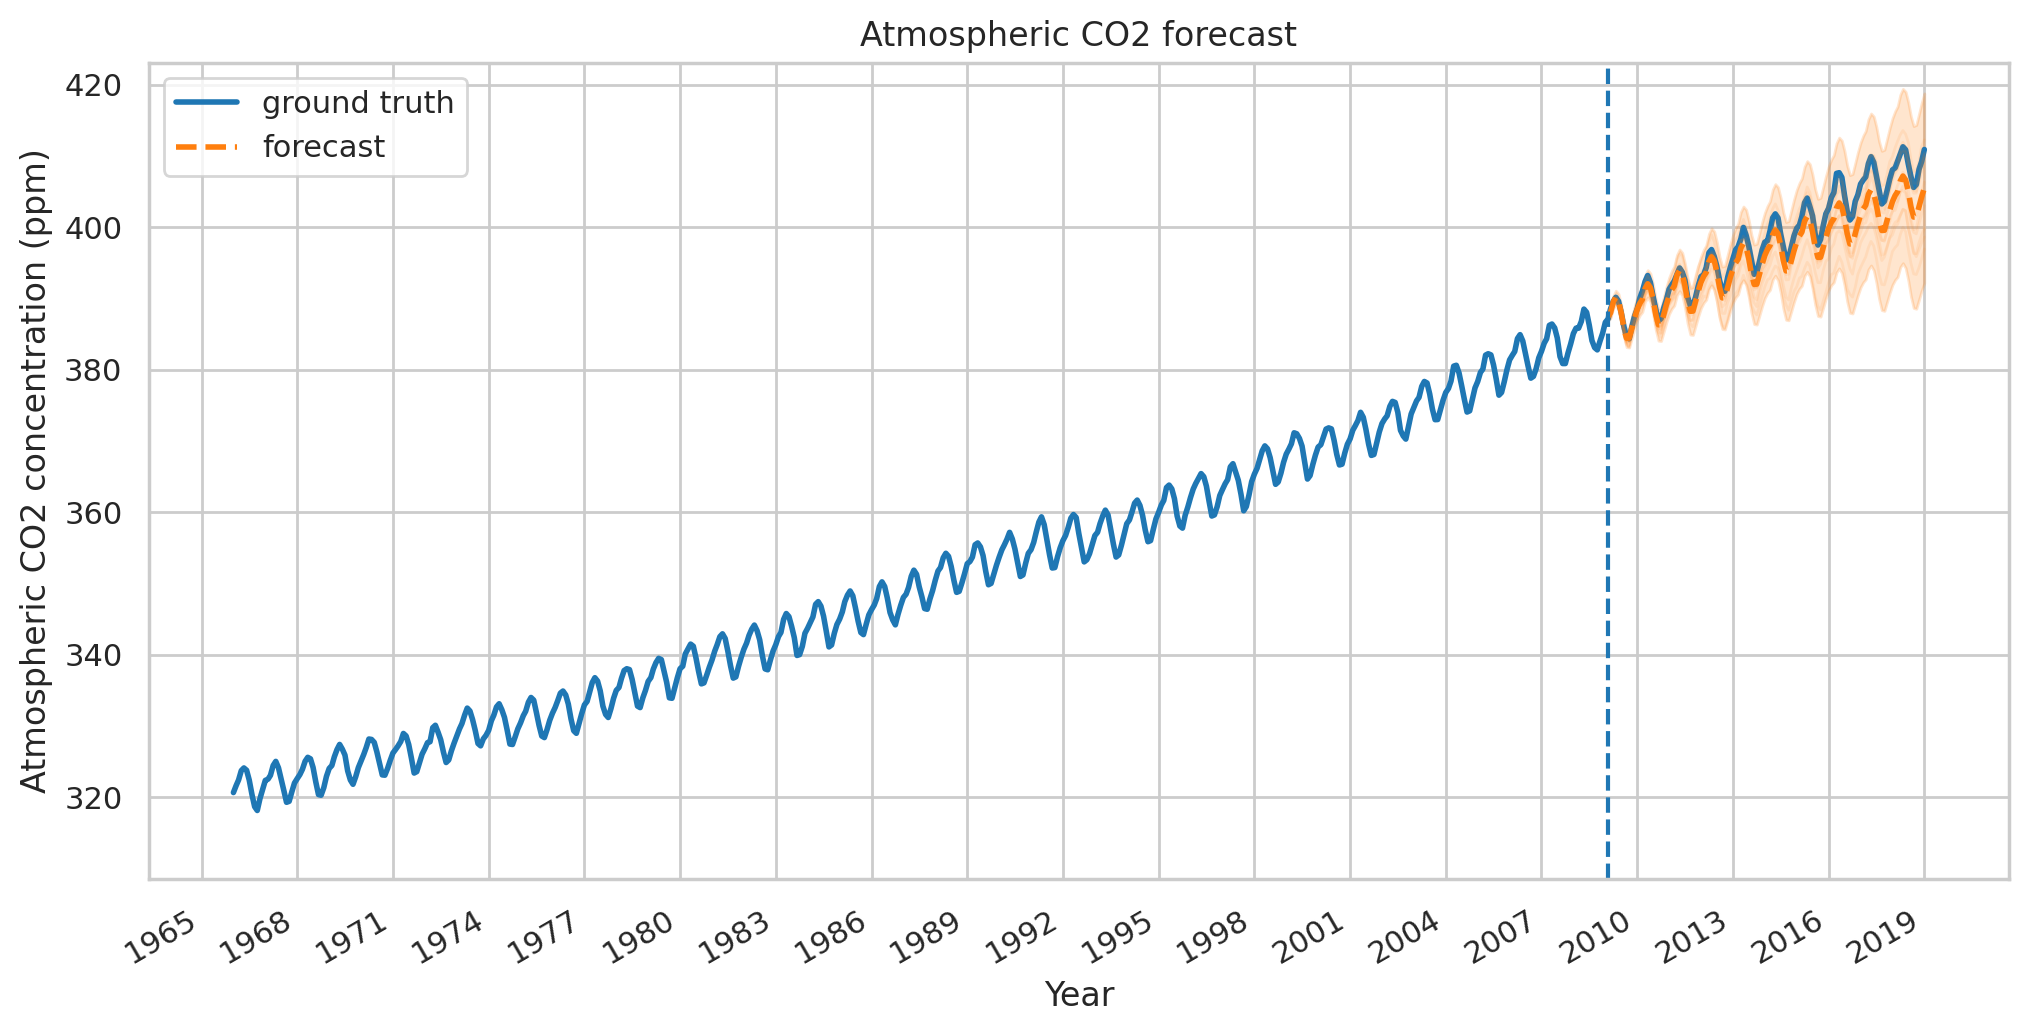

In [31]:
fig, ax = plot_forecast(
    co2_dates, co2_by_month,
    co2_forecast_mean, co2_forecast_scale, co2_forecast_samples,
    x_locator=co2_loc,
    x_formatter=co2_fmt,
    title="Atmospheric CO2 forecast")
ax.axvline(co2_dates[-num_forecast_steps], linestyle="--")
ax.legend(loc="upper left")
ax.set_ylabel("Atmospheric CO2 concentration (ppm)")
ax.set_xlabel("Year")
fig.autofmt_xdate()

In [32]:
# Build a dict mapping components to distributions over
# their contribution to the observed signal.
component_dists = sts.decompose_by_component(
    co2_model,
    observed_time_series=co2_by_month,
    parameter_samples=q_samples_co2_)

In [33]:
co2_component_means_, co2_component_stddevs_ = (
    {k.name: c.mean() for k, c in component_dists.items()},
    {k.name: c.stddev() for k, c in component_dists.items()})


(<Figure size 1200x500 with 2 Axes>,
 OrderedDict([('LocalLinearTrend/',
               <Axes: title={'center': 'LocalLinearTrend/'}>),
              ('Seasonal/', <Axes: title={'center': 'Seasonal/'}>)]))

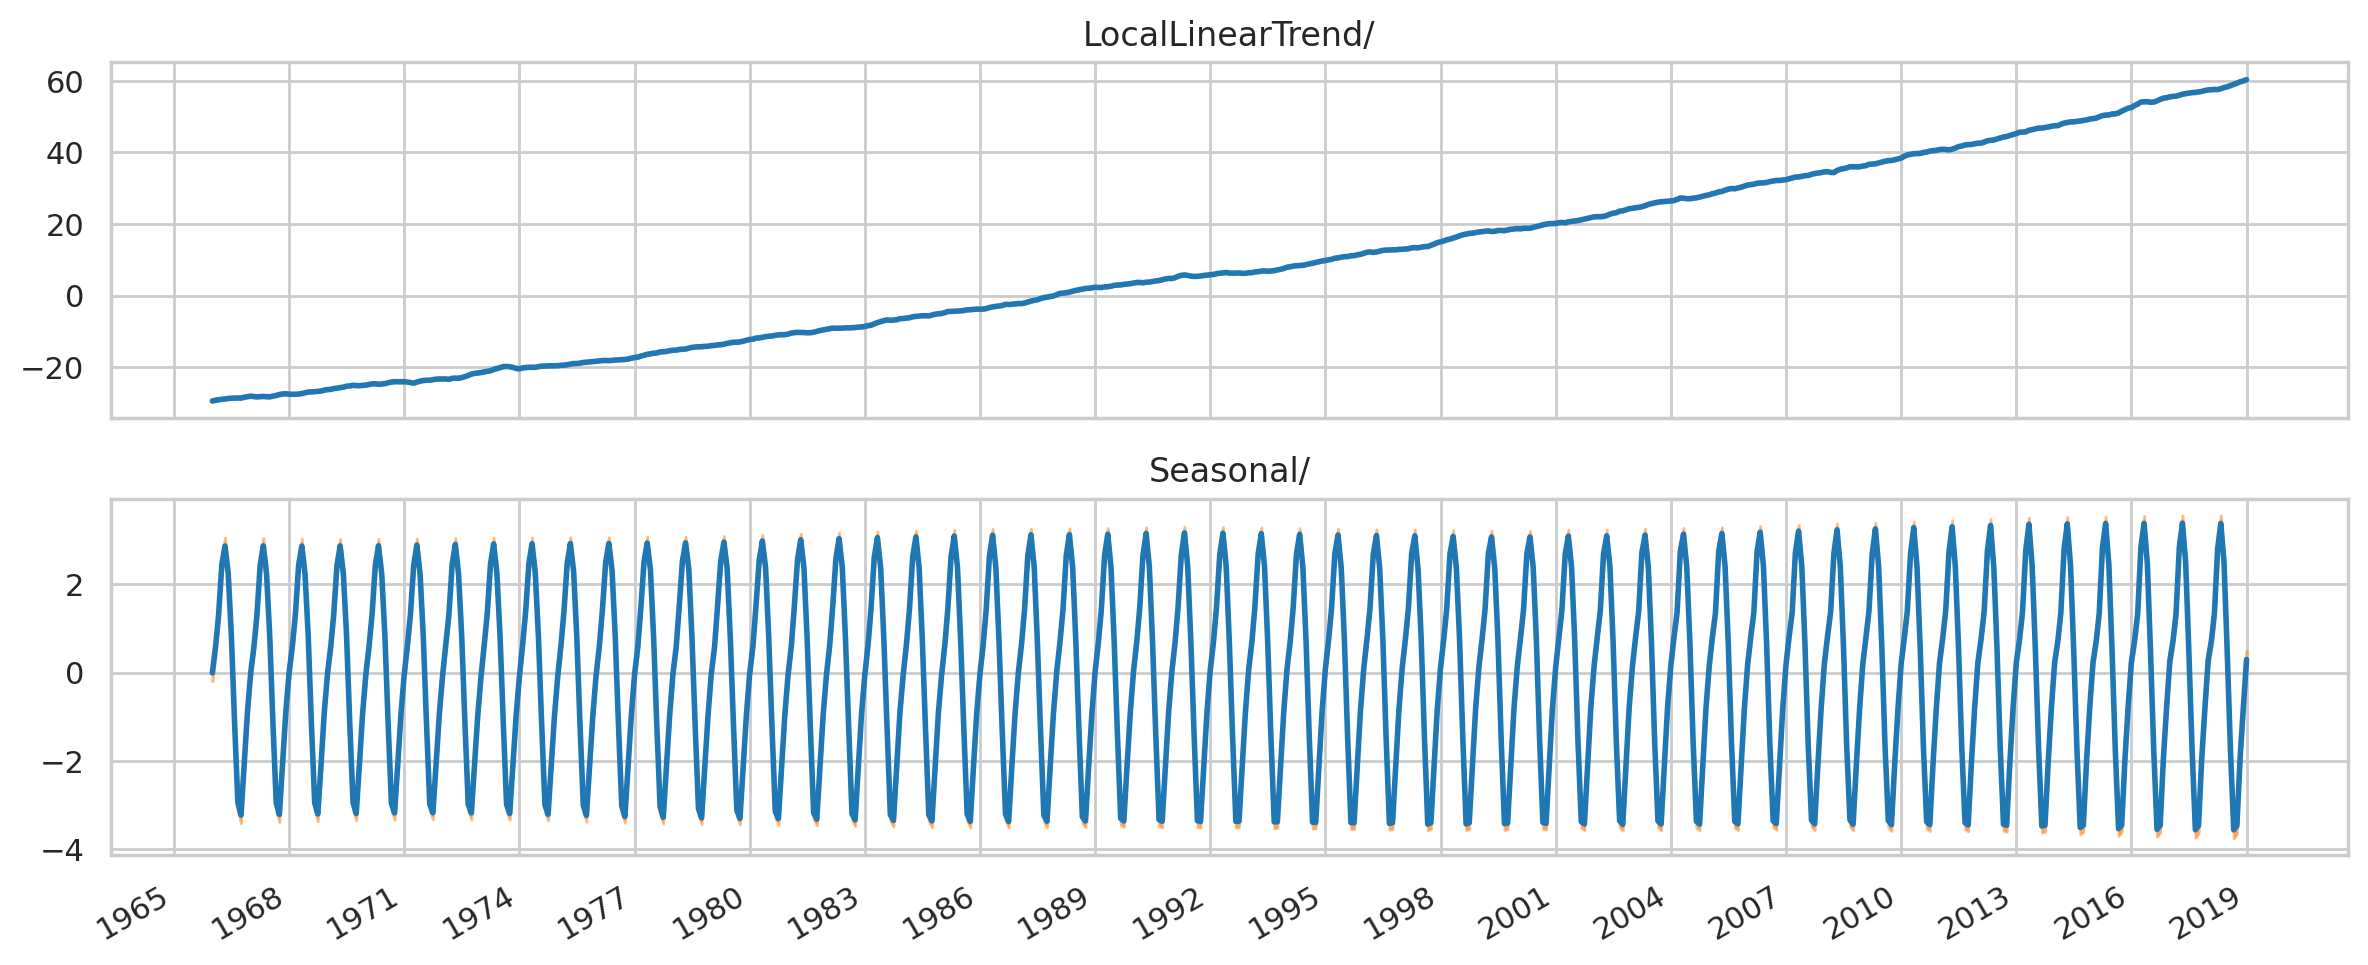

In [34]:
plot_components(co2_dates, co2_component_means_, co2_component_stddevs_,
                    x_locator=co2_loc, x_formatter=co2_fmt)